In [2]:
#Importing Libraries
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sympy import Symbol
import time
import math

#Graph Formatting
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

#Graph Font Edit
font = {'family':'Times New Roman',
        'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)

In [3]:
SIAltTable=[i*1000 for i in [0,1,3,5,10,25,50,75,100,130,160,200,300,400,600,1000]]
SITempTable=[288.15,281.651,268.65,255.65,223.252,221.552,270.65,206.65,195.08,469.27,696.29,845.56,976.01,995.83,999.85,1000]
SIPressTable=[i*101325 for i in [1,0.887,0.66919,0.53313,0.26151,0.025158,0.00078735,0.000020408,0.00000031593,1.2341e-8,2.9997e-9,8.3628e-10,8.6557e-11,1.4328e-11,8.1056e-13,7.4155e-14]]
USAltTable=[i*3.28084 for i in SIAltTable]
USTempTable=[i*1.8 for i in SITempTable]
USPressTable=[i*0.020885434273039 for i in SIPressTable]

AltTable=SIAltTable
TempTable=SITempTable
PressTable=SIPressTable

def ChangeUnits(change):
    
    global AltTable
    global TempTable
    global PressTable
    global GasConstant
    
    if (Units_Select.value == 'Metric'): 
        gravity.value=9.81
        AltTable=SIAltTable
        TempTable=SITempTable
        PressTable=SIPressTable
        Alt_Select.options=AltTable

    elif (Units_Select.value == 'Imperial'):
        gravity.value=32.17
        AltTable=USAltTable
        TempTable=USTempTable
        PressTable=USPressTable
        Alt_Select.options=AltTable
                                  
    else:
        print('ERROR')
    
    
    
def UpdateValues(change):
    
        temperature3.value=TempTable[AltTable.index(Alt_Select.value)]
        pressure3.value=PressTable[AltTable.index(Alt_Select.value)]
        
        
def ChamberPressure(pambient,k,M):
    po=pambient*(1+0.5*(k-1)*M**2)**(k/(k-1))
    return po

def ExpansionRatio(k,M):
    ER=(1/M)*((1+0.5*(k-1)*M**2)/(0.5*(k+1)))**((0.5*(k+1))/(k-1))
    return ER

def AreaRatio(k,P1_P2):
    ε=((((k+1)/2)**(1/(k-1)))*((1/P1_P2)**(1/k))*np.sqrt(((k+1)/(k-1))*(1-(1/P1_P2)**((k-1)/k))))**(-1)
    return ε

def AreaRatio(M2,γ):
    ε=(1/M2)*np.sqrt(((1+(γ-1)*M2**2)/((γ+1)/2))**((γ+1)/(γ-1)))
    return ε

def PressureRatio(k,M):
    PR=((1+0.5*(k-1)*M**2)**(k/(k-1)))**(-1)
    return PR

def PropulsionRatio(Mo,Mf,Ms):
    PPR=(Mf-Ms)/(Mo-Ms)
    return PPR

def PropellentMassFraction (Md,Mo,Ms):
    ζm=Md/(Mo-Ms)
    return ζm 

def TempRatio(k,M):
    TR=((1+0.5*(k-1)*M**2))**(-1)
    return TR

def PropMass(InitialM , FinalM):
    m=InitialM-FinalM
    return m

def MRVehicle(InitialM , FinalM):
    mr=FinalM/InitialM
    return mr

def MRSubSys(InitialM , FinalM , NonSysMass):
    mr=(FinalM-NonSysMass)/(InitialM-NonSysMass)
    return mr

def PMFVehicle(PropellantMass , InitialM):
    PMF=PropellantMass/InitialM
    return PMF

def PMFSubSys(PropellantMass , InitialM , NonSysMass):
    PMF=PropellantMass/(InitialM-NonSysMass)
    return PMF

def MassFlowRatio(PropM , BurnTime):
    mdot=PropM/BurnTime
    return mdot

def WeightFlow(mdot , gravitySL):  
    WFR=mdot*gravitySL  
    return WFR

def EEV_ISP(Isp , Gravity):
    c=Isp*Gravity
    return c

def EEV_Force(Thrust , mdot):    
    c=Thrust/mdot    
    return c

def Thrust(At,vt,v2,Vt,p2,p3,A2):
    F=((At*vt*v2)/Vt)+(p2-p3)*A2
    return F

def Thrust(Cf,At,P1):
    F=Cf*At*P1
    return F

def IdealThrust(c , mdot):
    Fi=mdot*c
    return Fi

def MomentumThrust(mdot , V2):    
    Fm=mdot*V2    
    return Fm

def PressureThrust (P2,P3,A2):
    Fp=(P2-P3)*A2
    return Fp

def TotalThrust(MomentumThrust , PressureThrust):    
    Ft=MomentumThrust+PressureThrust    
    return Ft

def TotalImpulse(Thrust,Time):    
    It=Thrust*Time   
    return It

def Acceleration(Thrust , Mass):   
    a=Thrust/Mass    
    return a

def CStar(ChamberP , ThroatArea , mdot):    
    cstar=(ChamberP*ThroatArea)/mdot    
    return cstar

def SpecificImpulse(Thrust,WFR):    
    Isp=Thrust/WFR    
    return Isp

def SpecificImpulseV(V,SpecGrav):    
    Isp=V/SpecGrav    
    return Isp

def SpecificImpulse (c,Gravity):
    Isp=c/Gravity
    return Isp

def ExhaustVmass(TotalThrust , PThrust , mdot):
    v=(TotalThrust-PThrust)/mdot
    return v

def CfIdeal(k,PR):
    Cf=(((2*k**2)/(k-1))*(2/(k+1))**((k+1)/(k-1))*(1-(PR)**((k-1)/k)))**0.5
    return Cf

def IdealExitVelocity (k,R,T1,PR):
    v2=(((2*k)/(k-1))*R*T1*(1-((PR)**-1)**((k-1)/k)))**(1/2)
    return v2

def VelocityThroat(k,R,Tth):
    vt=np.sqrt(k*R*Tth)
    return vt

def FindEpsln(numbers,eps):   
     numbers = np.asarray(numbers) 
     i=(np.abs(numbers - eps)).argmin() 
     return numbers[i]  

def AreaThroat (mdot,p1,R,T1,k):
    At=(mdot/p1)*((R*T1)/(k*(2/(k+1))**((k+1)/(k-1))))**(1/2)
    return At

def AreaThroatThrust (F,CF,P1):
    At=F/(CF*P1)
    return At

def FuelConsumptionRatio (Thrust,WFR):
    FCR=WFR/Thrust
    return FCR



In [4]:
#Conversion Factors
#Taken from Appendix 1 "Conversion Factors" pg.743
#designated: cf|code|number
#example: cfacc1

# Acceleration | Lt^2 | acc
def acc():
    m_sec2=3.2808*ft_sec2
    m_sec2=39.3701*in_sec2
    go=9.80665*m_sec2
    ft_sec2=0.3048*m_sec2
    ft_sec2=12*in_sec2
    go=32.174*ft_sec2

# Area | L^2| are
def are():
    m2=1550*in2
    m2=10.7639*ft2
    ft2=144*in2
    ft2=0.092903*m2
    in2=6.4516*10**-4*m2

# Density | ML^3 | den
def den():
    kg_m3=6.24279*10**-2*lbm_ft3
    kg_m3=3.61273*10**-5*lbm_in3
    lbm_ft3=16.0184*kg_m3
    lbm_in3=2.76799*10**4*kg_m3
    #Specific Gravity is dimensionless, same value as density

# Energy/Work/Heat | ML^2t^-2 | ene

# Force | MLt^-2 | frc
def frc():
    kg=9.80665*N #Force in Europe
    ton=kg*1000 #Force in Europe
    N=0.2248089*lbf
    lbf=4.448221*N

# Length/Distance | L | dis
def dis():
    m=3.2808*ft
    ft=0.3048*m
    ft=12*inch
    inch=2.54*cm
    inch=0.0254*m
    mile=1.609344*km
    mile=1609.344*m
    mile=5280*ft
    ntmile=1852*m

# Mass | M | mas
def mas():
    kg=2.205*lbm
    slug=32.174*lbm
    lbm=0.4536*kg

# Power | ML^2t^-3 | pow

# Pressure | ML^-1t^-2 | pre
def pre():
    bar=Pa*10**5
    atm=0.101325*MPa
    atm=14.696*psia
    MPa=Pa*10**6
    psi=6894.757*Pa
    #psi=lbf/in**2
    #bar=0.10*MPa
    #Pa=N/m**2

# Velocity/Speed | Lt^-1 | vel
def vel():
    m_sec=3.2808*ft_sec
    ft_sec=0.3048*m_sec
    knot=0.5144*m/sec
    mile_hr=0.477*m_sec

# Specific Heat | L^2t^-2T^-1 | sph

# Temperature | T | tem
def tem():
    K=(9/5)*R
    R=(5/9)*K
    C=(5/9)*(F-32)
    F=(9/5)*C+32
    #0C=273.15K
    #0F=459.67R

# Time | t | tim

# Viscosity | ML^-1t^-1| vis


# Part A. Example 6.1 Worksheet

### A liquid oxygen–liquid hydrogen rocket thrust chamber that produces 10,000-lbf thrust, operates at a chamber pressure of 1000 psia, a mixture ratio of 3.40, has exhaust products with a mean molecular mass 𝔐 of 8.90 lbm/lb-mol, combustion temperature  𝑇1  of 4380∘F, and specific heat ratio of 1.26. Determine the nozzle throat area, nozzle exit area for optimum operation at an altitude where  𝑃3  =  𝑃2  = 1.58 psia, the propellant sea-level weight and the volume flow rates, and the total propellant requirements for 2.5 min of operation. For this problem, assume that the actual specific impulse Is is 97% of theoretical and that the thrust coefficient  𝐶𝐹  is 98% of the ideal value.

# A)
## Redo Example 6.1 using this program and calculate the following design parameters:
- V2
- Ath
- A2
- M2
- Total Weight Flowrate, Wdot
- Oxidizer weight flowrate, Wdoto
- Fuel weight flowrate, Wdotf
- Total propellent weight required, Wp
- Total oxidizer weight required, Wo
- Total fuel weight required, Wf
- Oxidizer "volume flowrate" required, Vdoto
- Fuel "volume flowrate" required, Vdotf
- Total Oxidizer volume required, Vo
- Total Fuel volume required, Vf


In [5]:
#Definitions

def IdealExitVelocity (go,k,R,T1,P2,P1,𝔐):
    V2=np.sqrt((((2*go*k)/(k-1))*((R*T1)/𝔐))*(1-((P2/P1)**((k-1)/k))))
    return V2
               
def SpecificImpulse (V2,go):
    Isp=V2/go
    return Isp
               
def CFIdeal(k,P1,P2):
    CF=np.sqrt(((2*k**2)/(k-1))*(2/(k+1))**((k+1)/(k-1))*(1-(P1/P2)**((1-k)/k)))
    return CF

def AreaThroatThrustIdeal(F,CF,P1):
    At=F/(CF*P1)
    return At

def AreaThroatThrustActual(F,CF_A,P1):
    At_A=F/(CF_A*P1)
    return At
      
def AreaRatio(k,P1,P2):
    ε=((((k+1)/2)**(1/(k-1)))*((P2/P1)**(1/k))*np.sqrt(((k+1)/(k-1))*(1-(P2/P1)**((k-1)/k))))**(-1)
    return ε

def AreaRatioMach(M2,k):
    εt=(1/M2)*((1+((k-1)/2)*M2**2)/((k+1)/2))**((k+1)/(2*(k-1)))
    return εt

def AreaExitIdeal(At,ε):
    A2=At*ε
    return A2

def AreaExitActual(At_A,ε):
    A2_A=At_A*ε
    return A2

def WeightFlowrate(F,Isp_A):
    Wdot=F/Isp_A
    return Wdot

def WeightRequiredPropellent(Wdot,OT):
    WRP=Wdot*OT
    return WRP

def WeightFlowrateOx(Wdot,r):
    WdotOx=(Wdot*r)/(r+1)
    return WdotOx

def WeightFlowrateFuel(Wdot,r):
    WdotF=Wdot/(r+1)
    return WdotF

def WeightRequiredOx(WdotOx,OT):
    WROx=WdotOx*OT
    return WROx

def WeightRequiredFuel(WdotF,OT):
    WRF=WdotF*OT
    return WRF

def VolumeFlowrateOx(WdotOX,ρo):
    VdotOx=WdotOx/ρo
    return VdotOx

def VolumeFlowrateFuel(WdotF,ρf):
    VdotF=WdotF/ρf
    return VdotF

def VolumeRequiredOx(VdotOx,OT):
    VROx=VdotOx*OT
    return VROx

def VolumeRequiredFuel(VdotF,OT):
    VRF=VdotF*OT
    return VRF
               
#Given
F=10000     #Thrust | lbf
P1=1000     #Chamber Pressure | psia
r=3.4       #Mixture Ratio | unitless
𝔐=8.9      #Molecular Weight | lbm/lb-mol
T1=4840     #Chamber Temperature | ⁰R
k=1.26      #Specific Heat Ratio | unitless
P2=1.58     #Exit Pressure | psia
P3=P2       #Optimum Conditions
VCF=.97     #Specific Impulse Correction Factor
TCF=.98     #Coefficient of Thrust Correction Factor
R=1544      #Universal Gas Constant | ft.Lbf/Slug*°R
go=32.2     #Gravity | ft/s^2
P1_P2=P1/P2 #Pressure Ratio | Unitless
ρo=71.1     #Weight Density of Oxygen (Oxidizer) | lbf/ft^3
ρf=4.4      #Weight Density of Hydrogen (Fuel) | lbf/ft^3
OT=152      #Operation Time | seconds

#Fuel | Liquid Oxygen + Liquid Hydrogen
SG = 0.26     #Specific Gravity | Unitless
CSTAR = 2428  #Chamber Velocity | m/sec
             
    
#Exit Velocity
V2=IdealExitVelocity (go,k,R,T1,P2,P1,𝔐)

#Area Ratio
ε=AreaRatio(k,P1,P2)
#print("Area Ratio:\n\t",round(ε))

##Solver
##Calculating the Optimum Mach Number at Nozzle Exit | Unitless
M2=1      #Setting a test number to 1
res=0.001 #Setting the resolution of the calcualtion increase | Unitless
εt=ε-1    #Initial Value of Area Ratio Modified | Unitless
##Looping the Area Ratio Equation to solve for Mach at Exit
while (εt < ε):
    εt=AreaRatioMach(M2,k) #Equation 3-14 | Ideal Nozzle Area Ratio | Unitless
    M2=M2+res
    

#Ideal Specific Impulse
Isp=SpecificImpulse (V2,go)
#print("Ideal Specific Impulse:\n\t",int(Isp),"seconds \n")
    
#Actual Specific Impulse
Isp_A=Isp*VCF
#print("Actual Specific Impulse:\n\t",int(Isp_A),"seconds \n")

#Ideal Coefficient of Thrust
CF=CFIdeal(k,P1,P2)
#print("Ideal Coefficient of Thrust:\n\t",round(CF,2))
               
#Actual Coefficient of Thrust
CF_A=CF*TCF
#print("Actual Coefficient of Thrust:\n\t",round(CF_A,2))

#Throat Area
At=AreaThroatThrustIdeal(F,CF,P1)
At_A=AreaThroatThrustActual(F,CF_A,P1)

#Exit Area
A2=AreaExitIdeal(At,ε)
A2_A=AreaExitActual(At_A,ε)

#Total Weight Flowrate
Wdot=WeightFlowrate(F,Isp_A)

#Total Propellent Weight
WRP=WeightRequiredPropellent(Wdot,OT)

#Oxidizer Weight Flowrate
WdotOx=WeightFlowrateOx(Wdot,r)

#Oxidizer Weight Required
WROx=WeightRequiredOx(WdotOx,OT)

#Fuel Weight Flowrate
WdotF=WeightFlowrateFuel(Wdot,r)

#Fuel Weight Required
WRF=WeightRequiredFuel(WdotF,OT)

#Oxidizer Volume Flowrate
VdotOx=VolumeFlowrateOx(WdotOx,ρo)

#Oxidizer Volume Required
VROx=VolumeRequiredOx(VdotOx,OT)

#Fuel Volume Flowrate
VdotF=VolumeFlowrateFuel(WdotF,ρf)

#Fuel Volume Required
VRF=VolumeRequiredFuel(VdotF,OT)

#Actual Values
Wdot_A=round(F/(Isp_A),0)    #Weight flow rate of propellant |
WdotOx_A=r*Wdot_A/(r+1)      #Weight flow rate of oxidizer |
WdotF_A=Wdot_A/(r+1)         #Weight flow rate of fuel
WROx_A=WdotOx_A*OT           #Total oxidizer required for 2.5 min of operation |
WRF_A=WdotF_A*OT             #Total fuel required for 2.5 min of operation |
WRP_A=WROx_A+WRF_A           #Total Weight of Propellant at Sea Level |
VdotOx_A=WdotOx_A/ρo          #Volume Flow Rate of Oxidizer |
VdotF_A=WdotF_A/ρf           #Volume Flow Rate of Fuel |
VROx_A=VdotOx_A*OT           #Volume of Oxidizer |
VRF_A=VdotF_A*OT             #Volume of Fuel |

#Deliverables
print("Exit Velocity:\n\t",int(V2),"ft/s or",int(V2/3.2808),"m/s \n")
print("Throat Area:\n\t",round(At,1),"in^2")
print("Ideal Nozzle Exit Area:\n\t",round(A2,1),"in^2 or",round(A2/3.2808,7),"m^2 \n")
print("Ideal Exit Mach Number:\n\t",round(M2,4))
print("Total Weight Flowrate:\n\t",round(Wdot,1),"Lbf/sec")
print("Oxidizer Weight Flowrate:\n\t",round(WdotOx,1),"Lbf/sec")
print("Fuel Weight Flowrate:\n\t",round(WdotF,2),"Lbf/sec")
print("Total Propellent Weight Required:\n\t",round(WRP,2),"Lbf")
print("Oxidizer Weight Required for 152 seconds of Operation:\n\t",round(WROx,3),"Lbf")
print("Fuel Weight Required for 152 seconds of Operation:\n\t",round(WRF,3),"Lbf")
print("Oxidizer Volume Flowrate:\n\t",round(VdotOx,3),"Ft^3/sec")
print("Fuel Volume Flowrate:\n\t",round(VdotF,3),"Ft^3/sec")
print("Oxidizer Volume Required for 152 seconds of Operation:\n\t",round(VROx,3),"Ft^3")
print("Fuel Volume Required for 152 seconds of Operation:\n\t",round(VRF,3),"Ft^3")

#Plotting the Table
import plotly.graph_objects as go
headerColor = 'gray'
figu = go.Figure(data=[go.Table(
  header=dict(
    values=['<b>Parameter</b>','<b>Ideal Value</b>','<b>Actual Value</b>','<b>Unit</b>'],
    line_color='black',
    fill_color=headerColor,
    align=['left','center'],
    font=dict(color='white', size=14) #12
  ),
  cells=dict(
    values=[
      ['Exit Velocity, V2', 'Throat Area, At', 'Exit Area, A2', 'Mach at Exit, M2', 'Total Weight Flowrate','Oxidizer Weight Flowrate','Fuel Weight Flowrate','Total Propellant Weight','Total Oxidizer Weight','Total Fuel Weight','Oxidizer Volume Flowrate','Fuel Volume Flowrate','Total Oxidizer Volume','Total Fuel Volume'],
      [round(V2,-1),round(At,2),round(A2,1),round(M2,1),round(Wdot,2),round(WdotOx,2),round(WdotF,2),round(WRP,2),round(WROx,2),round(WRF,2),round(VdotOx,2),round(VdotF,2),round(VROx,2),round(VRF,2)],
      [round(V2,-1),round(At_A,2),round(A2_A,1),round(M2,1),round(Wdot_A,1),round(WdotOx_A,2),round(WdotF_A,2),round(WRP_A,0),round(WROx_A,0),round(WRF_A,0),round(VdotOx_A,2),round(VdotF_A,2),round(VROx_A,1),round(VRF_A,1)],
      ['ft/sec','inch^2','inch^2','unitless','lbf/sec','lbf/sec','lbf/sec','lbf','lbf','lbf','ft^3/sec','ft^3/sec','ft^3','ft^3']],
    line_color='black',
    # 2-D list of colors for alternating rows
    #fill_color = [[rowOddColor,rowEvenColor,rowOddColor,rowEvenColor,rowOddColor]*10],
    align = ['left', 'center'],
    font = dict(color = 'black', size = 12) #11
    ))
])

#figu.show(renderer="notebook")


Exit Velocity:
	 13885 ft/s or 4232 m/s 

Throat Area:
	 5.7 in^2
Ideal Nozzle Exit Area:
	 234.5 in^2 or 71.4703173 m^2 

Ideal Exit Mach Number:
	 4.63
Total Weight Flowrate:
	 23.9 Lbf/sec
Oxidizer Weight Flowrate:
	 18.5 Lbf/sec
Fuel Weight Flowrate:
	 5.43 Lbf/sec
Total Propellent Weight Required:
	 3633.77 Lbf
Oxidizer Weight Required for 152 seconds of Operation:
	 2807.912 Lbf
Fuel Weight Required for 152 seconds of Operation:
	 825.856 Lbf
Oxidizer Volume Flowrate:
	 0.26 Ft^3/sec
Fuel Volume Flowrate:
	 1.235 Ft^3/sec
Oxidizer Volume Required for 152 seconds of Operation:
	 39.492 Ft^3
Fuel Volume Required for 152 seconds of Operation:
	 187.695 Ft^3


In [9]:
#Givens
F=10000 #Thrust | lbf
P1=1000 #Chamber Pressure | psia
MR=3.4  #Mixture Ratio | unitless
𝔐=8.90  #lbm/lb-mol
T1=4380 #Combustion Temperature | Fahrenheit
T1=T1+459.67 # #Combustion Temperature | Rankine
k=1.26  #Ratio of Specific Heats | unitless
P3=1.58 #Ambient Pressure | psia
P2=P3   #Optimum Operation
VCF=0.97 #Velocity correction factor | unitless
TCF=0.98 #Thrust correction factor | unitless
go=32.2  #Acceleration due to gravity |
tp=2.5   #Time of propulsion | minutes
tp=tp*60+2 #Time of propulsion | seconds | 2 seconds added from example
R=1544   #Specific Gas Constant | ft⋅lbf⋅slug−1⋅°R−1
ρo=71.1  #Liquid Weight Density of Oxygen (Oxidizer) | lbf/ft^3
ρf=4.4   #Liquid Weight Density of Hydrogen (Fuel) | lbf/ft^3

#Fuel | Liquid Oxygen + Liquid Hydrogen
SG = 0.26     #Specific Gravity | Unitless
CSTAR = 2428  #Chamber Velocity | m/sec

#Find
V2=np.sqrt(((2*go*k/(k-1))*(R*T1/𝔐))*(1-(P2/P1)**((k-1)/k))) #Exhaust Velocity | ft/s
ε=((((k+1)/2)**(1/(k-1)))*((1/(P1/P2))**(1/k))*np.sqrt(((k+1)/(k-1))*(1-(1/(P1/P2))**((k-1)/k))))**(-1)
CF=(((2*k**2)/(k-1))*(2/(k+1))**((k+1)/(k-1))*(1-(P2/P1)**((k-1)/k)))**0.5
CF_A=CF*TCF
Isp=round(V2/go,0)
Isp_A=round(V2/go*VCF,0)
At=F/(CF*P1) #Ideal Nozzle Throat Area |
At_A=F/(P1*CF_A) #Actual Nozzle Throat Area
A2=ε*At #Ideal Nozzle Exit Area |
A2_A=ε*At_A #Actual Nozzle Exit Area |

#Ideal Exit Mach Number
#Calculating the Optimum Mach Number at Nozzle Exit | Unitless
M2=1      #Setting a test number to 1
res=0.00001 #Setting the resolution of the calcualtion increase | Unitless
εt=ε-1    #Initial Value of Area Ratio Modified | Unitless
#Looping the Area Ratio Equation to solve for Mach at Exit
while (εt < ε):
    εt=(1/M2)*((1+((k-1)/2)*M2**2)/((k+1)/2))**((k+1)/(2*(k-1))) #Equation 3-14 | Ideal Nozzle Area Ratio | Unitless
    M2=M2+res
M2=M2-res             #Subtracting the resolution from the M2 | unitless

Wdotp=F/(Isp)         #Weight flow rate of propellant |
Wdoto=MR*Wdotp/(MR+1) #Weight flow rate of oxidizer |
Wdotf=Wdotp/(MR+1)    #Weight flow rate of fuel
Wdot=Wdoto+Wdotf      #Total Weight Flow Rate 
Wo=Wdoto*tp           #Total oxidizer required for 2.5 min of operation |
Wf=Wdotf*tp           #Total fuel required for 2.5 min of operation |
Wp=Wo+Wf              #Total Weight of Propellant at Sea Level |
Vdoto=Wdoto/ρo        #Volume Flow Rate of Oxidizer |
Vdotf=Wdotf/ρf        #Volume Flow Rate of Fuel |
Vo=Vdoto*tp           #Volume of Oxidizer |
Vf=Vdotf*tp           #Volume of Fuel |

Wdot_A=round(F/(Isp_A),0) #Weight flow rate of propellant |
Wdoto_A=MR*Wdot_A/(MR+1)  #Weight flow rate of oxidizer |
Wdotf_A=Wdot_A/(MR+1)     #Weight flow rate of fuel
Wo_A=Wdoto_A*tp           #Total oxidizer required for 2.5 min of operation |
Wf_A=Wdotf_A*tp           #Total fuel required for 2.5 min of operation |
Wp_A=Wo_A+Wf_A            #Total Weight of Propellant at Sea Level |
Vdoto_A=Wdoto_A/ρo        #Volume Flow Rate of Oxidizer |
Vdotf_A=Wdotf_A/ρf        #Volume Flow Rate of Fuel |
Vo_A=Vdoto_A*tp           #Volume of Oxidizer |
Vf_A=Vdotf_A*tp           #Volume of Fuel |

#Plotting the Table
import plotly.graph_objects as go
headerColor = 'gray'
figu = go.Figure(data=[go.Table(
  header=dict(
    values=['<b>Parameter</b>','<b>Ideal Value</b>','<b>Actual Value</b>','<b>Unit</b>'],
    line_color='black',
    fill_color=headerColor,
    align=['left','center'],
    font=dict(color='white', size=14) #12
  ),
  cells=dict(
    values=[
      ['Exit Velocity, V2', 'Throat Area, At', 'Exit Area, A2', 'Mach at Exit, M2', 'Total Weight Flowrate','Oxidizer Weight Flowrate','Fuel Weight Flowrate','Total Propellant Weight','Total Oxidizer Weight','Total Fuel Weight','Oxidizer Volume Flowrate','Fuel Volume Flowrate','Total Oxidizer Volume','Total Fuel Volume'],
      [round(V2,-1),round(At,2),round(A2,1),round(M2,1),round(Wdot,2),round(Wdoto,2),round(Wdotf,2),round(Wp,2),round(Wo,2),round(Wf,2),round(Vdoto,2),round(Vdotf,2),round(Vo,2),round(Vf,2)],
      [round(V2,-1),round(At_A,2),round(A2_A,1),round(M2,1),round(Wdot_A,1),round(Wdoto_A,2),round(Wdotf_A,2),round(Wp_A,0),round(Wo_A,0),round(Wf_A,0),round(Vdoto_A,2),round(Vdotf_A,2),round(Vo_A,1),round(Vf_A,1)],
      ['ft/sec','inch^2','inch^2','unitless','lbf/sec','lbf/sec','lbf/sec','lbf','lbf','lbf','ft^3/sec','ft^3/sec','ft^3','ft^3']],
    line_color='black',
    # 2-D list of colors for alternating rows
    #fill_color = [[rowOddColor,rowEvenColor,rowOddColor,rowEvenColor,rowOddColor]*10],
    align = ['left', 'center'],
    font = dict(color = 'black', size = 12) #11
    ))
])

#figu.show(renderer="notebook")

# Part B. Conical Nozzle Design
### Design a Conical Nozzle with 15° half angles and an 80% Rao Nozzle for the above engine. Print the CAD models.

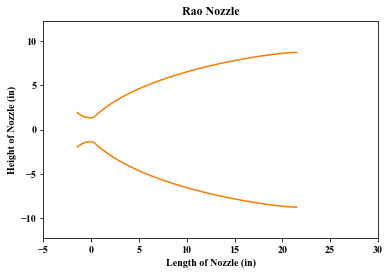

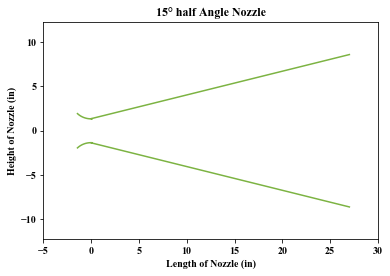

Plotted Data is populated


In [6]:
#Use the program already developed as a stand alone function
# Pre-setting Data Point Arrays for the Nozzles
X=[]   #X coord for Rao
Y=[]   #Y coord for Rao
X15=[] #X coord for 15⁰
Y15=[] #Y coord for 15⁰

#Engine Information | Provided Inputs
Coneθ=15 #Angle of Cone | Degrees
Dt=np.sqrt(At*4/np.pi)  #Throat Diameter | in
Rt=Dt/2  #Throat Radius | in
D2=np.sqrt(A2*4/np.pi)  #Exit Diameter | in
Re=D2/2  #Exit Radius |in
Ln=((D2-Dt)/2)*(np.sin(math.radians(90-Coneθ))/np.sin(math.radians(Coneθ)))   #Nozzle Length | in
θN=40    #Nozzle Curve Angle Estimate | degrees
θE=8     #Exit Angle Estimate | degrees

#Converging Nozzle
for i in range (-135,-90,1):
    # Rao Nozzle Convergence
    X.append(1.5*Rt*math.cos(math.radians(i)))
    Y.append(1.5*Rt*math.sin(math.radians(i))+1.5*Rt+Rt)
    # Cone Nozzle Convergence
    X15.append(1.5*Rt*math.cos(math.radians(i)))
    Y15.append(1.5*Rt*math.sin(math.radians(i))+1.5*Rt+Rt)

#Throat and Circular Divergence
# Rao Nozzle
for i in range (-90,(θN-90),1):
    X.append(0.382*Rt*math.cos(math.radians(i)))
    Y.append(0.382*Rt*math.sin(math.radians(i))+0.382*Rt+Rt)
# Cone Nozzle
for i in range (-90,(15-90),1):    
    X15.append(0.382*Rt*math.cos(math.radians(i)))
    Y15.append(0.382*Rt*math.sin(math.radians(i))+0.382*Rt+Rt)

#Bell Divergence
Ex=Ln #Exit x-axis length | Length of Bell | in
Ey=Re #Exit y-axis height | Radius at Exit | in
Nx=0.382*Rt*math.cos(math.radians(θN-90))
Ny=0.382*Rt*math.sin(math.radians(θN-90))+0.382*Rt+Rt
m1=math.tan(math.radians(θN))
m2=math.tan(math.radians(θE))
C1=Ny-m1*Nx
C2=Ey-m2*Ex
Qx=(C2-C1)/(m1-m2)
Qy=(m1*C2-m2*C1)/(m1-m2)

for t in range (0,100,1):
    t=t/100
    X.append(((1-t)**0.5)*Nx+2*(1-t)*t*Qx+(t**2)*Ex*0.8)
    Y.append(((1-t)**0.5)*Ny+2*(1-t)*t*Qy+(t**2)*Ey)

#15º Half Angle Divergence
Nx15=0.382*Rt*math.cos(math.radians(15-90))
Ny15=0.382*Rt*math.sin(math.radians(15-90))+0.382*Rt+Rt
xtemp=int(round(Nx))
while math.tan(math.radians(15))*xtemp+Ny15 < Re: #Creating the conical shape
    X15.append(xtemp)
    Y15.append(math.tan(math.radians(15))*xtemp+Ny15)
    xtemp=xtemp+1
    
#Plotting the Bell Nozzle 
NegY=[i*-1 for i in Y] #Creating the other side
col= '#f57c00'
plt.plot(X,Y,color=col)
plt.plot(X,NegY,color=col)
plt.xlim([-5,30])
plt.ylim([-12.26635,12.26635])
plt.title('Rao Nozzle')
plt.xlabel('Length of Nozzle (in)')
plt.ylabel('Height of Nozzle (in)')
plt.show()

# Plotting 15 degree Half Angle Nozzle
NegY15=[i*-1 for i in Y15] #Creating the other side
col='#7cb342'
plt.plot(X15,Y15,color=col)
plt.plot(X15,NegY15,color=col)
plt.xlim([-5,30])
plt.ylim([-12.26635,12.26635])
plt.title('15° half Angle Nozzle')
plt.xlabel('Length of Nozzle (in)')
plt.ylabel('Height of Nozzle (in)')
plt.show()

def writetofile():
    import os
    outputname='Plotted Data'
    #X-coordinates
    a=X
    #Y-Coordinates
    b=Y
    #X15-Coordinates
    c=X15
    #Y15-Coordinates
    d=Y15
    
     #Opens the average.txt file and writes the passed data onto the txt file
    myfile=open(outputname,'w')
    myfile.write('X values are: '+str(a)+'\n')
    myfile.write('Y values are: '+str(b)+'\n')
    myfile.write('X15 values are: '+str(c)+'\n')
    myfile.write('Y15 values are: '+str(d)+'\n')
    
    myfile.close()
    
    if os.stat(outputname).st_size > 0:
        print("Plotted Data is populated")
    else:
        print("The output file is empty, need to check")
        
writetofile()

# Part D. Table 5.5
### Type up table 5.5 into my computer program

In [1]:
#Oxidizer,Fuel,MR by Mass,MR by Volume,Average Specific Gravity,Chamber Temp (K),Chamber c* (m/sec),M (kg/mol),Is Frozen,k
def FUEL(Oxidizer,Fuel):
#Oxygen
    O=[['Methane',3.20,0.81,3526,1835,20.3,296,1.2] 
    ,['Hydrazine',0.74,1.06,3285,1871,18.3,301,1.25]
    ,['Hydrogen',3.40,0.26,2959,2428,8.9,386,1.26]
    ,['RP-1',2.24,1.01,3571,1774,21.9,285.4,1.24]
    ,['UDMH',1.39,0.96,3542,1835,19.8,295,1.25]]
#Fluorine
    F=[['Hydrazine',2.30,1.31,4713,2208,19.4,365,1.33] 
    ,['Hydrogen',4.54,0.33,3080,2534,8.9,389,1.33]]
#Nitrogen Tetroxide
    NT=[['Hydrazine',1.08,1.2,3258,1765,19.5,283,1.26] 
    ,['50% UDMH',1.62,1.18,3242,1652,21,278,1.24]
    ,['RP-1',3.4,1.23,3290,1774,24.1,297,1.23]
    ,['MMH',1.65,1.16,3200,1591,21.7,278,1.23]]
#Red Fuming Nitric Acid
    RFNA=[['RP-1',4.1,1.35,3175,1594,24.6,258,1.22] 
    ,['50% UDMH',1.73,1.23,2997,1682,20.6,272,1.22]]
#Hydrogen Peroxide 90%
    HP=['RP-1',7.0,4.01,1.29,2760,1774,21.7,297,1.19] #Hydrogen Peroxide 90%
    if (Oxidizer == 0):
        MR=O[Fuel][1]
        SG=O[Fuel][2]
        T1=O[Fuel][3]
        CSTAR=O[Fuel][4]
        𝔐=O[Fuel][5]
        Isp=O[Fuel][6]
        k=O[Fuel][7]
    if (Oxidizer == 1):
        MR=F[Fuel][1]
        SG=F[Fuel][2]
        T1=F[Fuel][3]
        CSTAR=F[Fuel][4]
        𝔐=F[Fuel][5]
        Isp=F[Fuel][6]
        k=F[Fuel][7]
    if (Oxidizer == 2):
        MR=NT[Fuel][1]
        SG=NT[Fuel][2]
        T1=NT[Fuel][3]
        CSTAR=NT[Fuel][4]
        𝔐=NT[Fuel][5]
        Isp=NT[Fuel][6]
        k=NT[Fuel][7]
    if (Oxidizer == 3):
        MR=RFNA[Fuel][1]
        SG=RFNA[Fuel][2]
        T1=RFNA[Fuel][3]
        CSTAR=RFNA[Fuel][4]
        𝔐=RFNA[Fuel][5]
        Isp=RFNA[Fuel][6]
        k=RFNA[Fuel][7]
    elif (Oxidizer == 4):
        MR=HP[Fuel][1]
        SG=HP[Fuel][2]
        T1=HP[Fuel][3]
        CSTAR=HP[Fuel][4]
        𝔐=HP[Fuel][5]
        Isp=HP[Fuel][6]
        k=HP[Fuel][7]
    return MR,SG,T1,CSTAR,𝔐,Isp,k

MR,SG,T1,CSTAR,𝔐,Isp,k = FUEL(1,0)
print(MR,SG,T1,CSTAR,𝔐,Isp,k)

1.39 0.96 3542 1835 19.8 295 1.25
